<a href="https://colab.research.google.com/github/hwankang/Deep-Chemometrics/blob/master/17(tues)_Jan_10_30_pm__R2%3Dminus_0_612_NIR_a_true_only_test_set_50_instead_of_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The program of deep learning with A_NIR Data


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filename_a='/content/drive/MyDrive/machine_learning/A_NIR_DATA_csv.csv'
X2_df_t = pd.read_csv(filename_a,header=0, 
                   encoding="unicode-escape")
X2_df_t

Mounted at /content/drive


,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_A,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,24.00,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,2,True,24.00,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,3,True,24.00,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,4,True,23.60,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,5,True,23.60,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2035,True,25.52,0.076506,0.075591,0.074629,0.072980,0.072275,0.072979,0.072688,...,2.962918,2.970997,2.967865,2.957785,2.952054,2.949278,2.941087,2.935639,2.936698,2.938116
2035,2036,True,25.52,0.071916,0.071201,0.070450,0.068871,0.068104,0.068746,0.068455,...,2.982798,2.982529,2.968697,2.958179,2.962882,2.967330,2.958188,2.948901,2.948394,2.943151
2036,2037,True,25.37,0.055557,0.054680,0.053789,0.052091,0.051338,0.052176,0.052068,...,2.960384,2.958313,2.946722,2.938467,2.936874,2.936340,2.925951,2.920350,2.921682,2.917657
2037,2038,True,25.37,0.050590,0.049846,0.049057,0.047327,0.046489,0.047292,0.047258,...,2.968252,2.967836,2.953877,2.942397,2.945923,2.948910,2.940729,2.926084,2.923839,2.919868


In [3]:
xx,yy=X2_df_t.shape
ai=[]
for i in range(xx):
    if X2_df_t.iloc[i,1]==False:
        ai.append(i)
X2_df=X2_df_t.drop(ai,axis=0) #
X2_df

,Unnamed: 0,¸ðµ¨ Æ÷ÇÔ,Y_A,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,1,True,24.00,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,2,True,24.00,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,3,True,24.00,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,4,True,23.60,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,5,True,23.60,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,2035,True,25.52,0.076506,0.075591,0.074629,0.072980,0.072275,0.072979,0.072688,...,2.962918,2.970997,2.967865,2.957785,2.952054,2.949278,2.941087,2.935639,2.936698,2.938116
2035,2036,True,25.52,0.071916,0.071201,0.070450,0.068871,0.068104,0.068746,0.068455,...,2.982798,2.982529,2.968697,2.958179,2.962882,2.967330,2.958188,2.948901,2.948394,2.943151
2036,2037,True,25.37,0.055557,0.054680,0.053789,0.052091,0.051338,0.052176,0.052068,...,2.960384,2.958313,2.946722,2.938467,2.936874,2.936340,2.925951,2.920350,2.921682,2.917657
2037,2038,True,25.37,0.050590,0.049846,0.049057,0.047327,0.046489,0.047292,0.047258,...,2.968252,2.967836,2.953877,2.942397,2.945923,2.948910,2.940729,2.926084,2.923839,2.919868


In [4]:
X3_df=X2_df.iloc[:,3:]
X3_df

,899.9280058,900.2520706,900.5763689,900.9009009,901.2256669,901.5506671,901.8759019,902.2013713,902.5270758,902.8530155,...,2477.700694,2480.15873,2482.621648,2485.089463,2487.562189,2490.039841,2492.522433,2495.00998,2497.502498,2500
0,0.098681,0.100515,0.102056,0.100267,0.096954,0.096161,0.097151,0.096790,0.095622,0.095521,...,2.968741,2.968988,2.958685,2.950201,2.950122,2.948725,2.939113,2.929406,2.929555,2.927579
1,0.098081,0.099926,0.101394,0.099664,0.096598,0.095915,0.096567,0.095609,0.094073,0.093994,...,2.960005,2.959948,2.951504,2.945633,2.947553,2.947326,2.937901,2.926926,2.924102,2.920722
2,0.089885,0.092072,0.094055,0.092618,0.089560,0.088900,0.089790,0.089088,0.087585,0.087353,...,2.943931,2.943679,2.930295,2.919846,2.920668,2.922776,2.913596,2.904503,2.903535,2.901086
3,0.088701,0.090287,0.091825,0.090534,0.087883,0.087348,0.088151,0.087593,0.086458,0.086425,...,2.935452,2.938259,2.928736,2.921757,2.924166,2.924666,2.914831,2.905151,2.902643,2.897351
4,0.095273,0.096945,0.098684,0.097460,0.094674,0.093949,0.094563,0.093743,0.092318,0.092116,...,2.966199,2.968021,2.955198,2.942411,2.943006,2.942151,2.931640,2.918549,2.918717,2.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,0.076506,0.075591,0.074629,0.072980,0.072275,0.072979,0.072688,0.070171,0.068566,0.069321,...,2.962918,2.970997,2.967865,2.957785,2.952054,2.949278,2.941087,2.935639,2.936698,2.938116
2035,0.071916,0.071201,0.070450,0.068871,0.068104,0.068746,0.068455,0.065891,0.064076,0.064532,...,2.982798,2.982529,2.968697,2.958179,2.962882,2.967330,2.958188,2.948901,2.948394,2.943151
2036,0.055557,0.054680,0.053789,0.052091,0.051338,0.052176,0.052068,0.049510,0.047720,0.048518,...,2.960384,2.958313,2.946722,2.938467,2.936874,2.936340,2.925951,2.920350,2.921682,2.917657
2037,0.050590,0.049846,0.049057,0.047327,0.046489,0.047292,0.047258,0.044905,0.043365,0.044220,...,2.968252,2.967836,2.953877,2.942397,2.945923,2.948910,2.940729,2.926084,2.923839,2.919868


In [41]:
#special run
#X_df_1=X3_df.iloc[39:,:]
#X_df_2=X3_df.iloc[18:39,:]
#X_df_3=X3_df.iloc[0:18,:]
#X_df_1=X3_df.iloc[400:,:]
#X_df_2=X3_df.iloc[200:400,:]
#X_df_3=X3_df.iloc[0:200,:]
##X_df_1=X3_df.iloc[200:,:]
##X_df_2=X3_df.iloc[100:200,:]
##X_df_3=X3_df.iloc[0:100,:]
X_df_1=X3_df.iloc[100:,:]
X_df_2=X3_df.iloc[50:100,:]
X_df_3=X3_df.iloc[0:50,:]
X_train_df=X_df_1
X_val_df=X_df_2
X_test_df=X_df_3
X3_df.shape

(1823, 1779)

In [42]:
Y3_df=X2_df.iloc[:,2:3]
Y3_df

,Y_A
0,24.00
1,24.00
2,24.00
3,23.60
4,23.60
...,...
2034,25.52
2035,25.52
2036,25.37
2037,25.37


In [43]:
#Y_df_1=Y3_df.iloc[39:,:]
#Y_df_2=Y3_df.iloc[18:39,:]
#Y_df_3=Y3_df.iloc[0:18,:]
#Y_df_1=Y3_df.iloc[400:,:]
#Y_df_2=Y3_df.iloc[200:400,:]
#Y_df_3=Y3_df.iloc[0:200,:]
##Y_df_1=Y3_df.iloc[200:,:]
##Y_df_2=Y3_df.iloc[100:200,:]
##Y_df_3=Y3_df.iloc[0:100,:]
Y_df_1=Y3_df.iloc[100:,:]
Y_df_2=Y3_df.iloc[50:100,:]
Y_df_3=Y3_df.iloc[0:50,:]
y_train_df=Y_df_1
y_val_df=Y_df_2
y_test_df=Y_df_3

In [44]:
#X_train_val_df=X_train_df.append(X_val_df)
#X_train_val=X_train_val_df.values
X_train_a=X_train_df.values
X_val_a=X_val_df.values
X_test_a=X_test_df.values
y_train=y_train_df.values
y_val=y_val_df.values
y_test=y_test_df.values

In [45]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#X_train_val=X_train_a.append(X_val_a)
#std.fit(X_train_val)
std.fit(X_train_a)
X_train=std.transform(X_train_a)
#std.fit(X_val_a)
X_val=std.transform(X_val_a)
#std.fit(X_test_a)
X_test=std.transform(X_test_a)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(axisscale,X_train.T)
plt.xlabel('nm')
plt.ylabel('normalized intensity')
plt.title('Normalized training data')
plt.show()

NameError: ignored

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, Reshape#, MaxPooling1D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.noise import GaussianNoise

In [47]:
#Hyperparameters for the network
DENSE = 128
#DROPOUT = 0.025
DROPOUT = 0
C1_K  = 8 #Number of kernels/feature extractors for first layer
C1_S  = 32 #Width of the convolutional mini networks
C2_K  = 16
C2_S  = 32

activation='relu'
#activation='sigmoid'

input_dim = X_train.shape[1]

#The model
def make_model():
    model = Sequential()
    #Adding a bit of GaussianNoise also works as regularization
    #model.add(GaussianNoise(0.05, input_shape=(input_dim,)))
    #model.add(GaussianNoise(0.005, input_shape=(input_dim,)))
    model.add(GaussianNoise(0.004, input_shape=(input_dim,)))
    model.add(GaussianNoise(0.001, input_shape=(input_dim,)))
    #First two is number of filter + kernel size
    model.add(Reshape((input_dim, 1)))
    #model.add(Conv1D(C1_K, (C1_S), activation=activation, border_mode='same'))
    #model.add(Conv1D(C2_K, (C2_S), border_mode='same', activation=activation))
    model.add(Conv1D(C1_K, (C1_S), activation=activation, padding='same'))
    model.add(Conv1D(C2_K, (C2_S), padding='same', activation=activation))
    model.add(Flatten())
    model.add(Dropout(DROPOUT))
    model.add(Dense(DENSE, activation=activation))
    model.add(Dense(1, activation='linear'))

    #model.compile(loss='mse', optimizer=keras.optimizers.Adadelta(lr=0.01))#, metrics=['mean_absolute_error'])
    model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.002))#, metrics=['mean_absolute_error'])

    return model

In [48]:
model = make_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_4 (GaussianN  (None, 1779)             0         
 oise)                                                           
                                                                 
 gaussian_noise_5 (GaussianN  (None, 1779)             0         
 oise)                                                           
                                                                 
 reshape_3 (Reshape)         (None, 1779, 1)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 1779, 8)           264       
                                                                 
 conv1d_7 (Conv1D)           (None, 1779, 16)          4112      
                                                                 
 flatten_3 (Flatten)         (None, 28464)            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [49]:
h = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_data=(X_val, y_val))

Epoch 1/200
216/216 [==============================] - 1s 5ms/step - loss: 28.2081 - val_loss: 6.1285
Epoch 2/200
216/216 [==============================] - 1s 4ms/step - loss: 5.5056 - val_loss: 2.5623
Epoch 3/200
216/216 [==============================] - 1s 4ms/step - loss: 4.6875 - val_loss: 3.2139
Epoch 4/200
216/216 [==============================] - 1s 4ms/step - loss: 3.9631 - val_loss: 5.6607
Epoch 5/200
216/216 [==============================] - 1s 4ms/step - loss: 3.3741 - val_loss: 2.4528
Epoch 6/200
216/216 [==============================] - 1s 4ms/step - loss: 3.4654 - val_loss: 2.4886
Epoch 7/200
216/216 [==============================] - 1s 4ms/step - loss: 2.9040 - val_loss: 2.6648
Epoch 8/200
216/216 [==============================] - 1s 4ms/step - loss: 6.9352 - val_loss: 2.2808
Epoch 9/200
216/216 [==============================] - 1s 4ms/step - loss: 3.6786 - val_loss: 12.6316
Epoch 10/200
216/216 [==============================] - 1s 4ms/step - loss: 2.6610 - val_

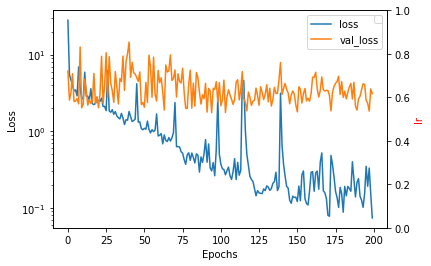

In [50]:
#import matplotlib.psplot as plt
import matplotlib.pyplot as plt
plt.plot(h.history['loss'], label='loss')
plt.plot(h.history['val_loss'], label='val_loss')

plt.yscale('log')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
ax2 = plt.gca().twinx()
#ax2.plot(h.history['lr'], color='r')
ax2.set_ylabel('lr',color='r')

_ = plt.legend()

2/2 [==============================] - 0s 6ms/step


Text(0, 0.5, 'predicted value')

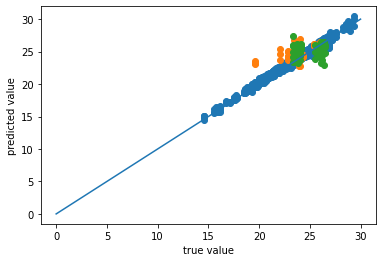

In [51]:
plt.scatter(y_train, model.predict(X_train))
plt.scatter(y_val, model.predict(X_val))
plt.scatter(y_test, model.predict(X_test))
plt.plot([0,30],[0,30]) # Y = PredY line
plt.xlabel('true value')
plt.ylabel('predicted value')

In [52]:
pred_Y_df=model.predict(X_test)
Y_df_true=y_test
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(Y_df_true, pred_Y_df)
rmse=np.sqrt(mse)
r2=r2_score(Y_df_true, pred_Y_df)
print('MSE : {: 0.3f}, || RMSE : {: 0.3f}, || R2 : {: 0.3f}'.format(mse,rmse,r2))

2/2 [==============================] - 0s 5ms/step
MSE :  2.387, || RMSE :  1.545, || R2 : -0.612


#The end of program 